In [2]:
import pandas as pd

# On charge le fichier ressources
df = pd.read_csv('animes.csv')

# On regarde les 5 premières lignes pour vérifier le contenu
print("Aperçu des données :")
display(df.head())

# On vérifie les types de colonnes (notes, épisodes, etc.)
print("\nStatistiques des données :")
display(df.describe())

Aperçu des données :


,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.



Statistiques des données :


,Nb_Episodes,Note_Globale,Note_Meilleur_Ep,Note_Pire_Ep
count,61.000000,61.000000,61.000000,61.000000
mean,90.737705,8.316393,9.318033,6.719672
std,162.055227,0.521594,0.469932,1.369650
min,3.000000,6.000000,8.200000,0.000000
25%,24.000000,8.100000,9.100000,6.200000
50%,37.000000,8.400000,9.400000,7.200000
75%,76.000000,8.600000,9.700000,7.500000
max,1090.000000,9.300000,9.900000,8.400000


In [3]:
# Vérifier s'il y a des trous dans les données
print("Nombre de valeurs manquantes par colonne :")
print(df.isnull().sum())

Nombre de valeurs manquantes par colonne :
Anime                 0
Genre_Tags            0
Source                0
Nb_Episodes           0
Status                0
Studio                0
Date_Pub              0
Note_Globale          0
Note_Meilleur_Ep      0
Meilleur_Ep_Titre     0
Comm_Meilleur_Ep      0
Note_Pire_Ep          0
Pire_Ep_Titre         0
Comm_Pire_Ep          0
Comm_Saison_1         0
Comm_Saison_2         0
Comm_Saison_3        10
dtype: int64


In [4]:
df['Note_Globale'] = pd.to_numeric(df['Note_Globale'], errors='coerce')
df['Note_Meilleur_Ep'] = pd.to_numeric(df['Note_Meilleur_Ep'], errors='coerce')
df['Note_Pire_Ep'] = pd.to_numeric(df['Note_Pire_Ep'], errors='coerce')

print("Nettoyage terminé. Données prêtes pour le calcul du score.")

Nettoyage terminé. Données prêtes pour le calcul du score.


In [5]:
# 1. Calcul de l'Ecart 
df['Ecart'] = df['Note_Meilleur_Ep'] - df['Note_Pire_Ep']

# 2. Calcul de la Regularite 
df['Regularite'] = 10 - df['Ecart']

# 3. Calcul du Score_Qualite 
df['Score_Qualite'] = (df['Note_Globale'] * 0.7) + (df['Regularite'] * 0.3)

# affiche les 10 meilleurs résultats
display(df[['Anime', 'Note_Globale', 'Regularite', 'Score_Qualite']].sort_values(by='Score_Qualite', ascending=False).head(10))

,Anime,Note_Globale,Regularite,Score_Qualite
35,Frieren: Beyond Journey's End,9.3,7.9,8.88
21,Steins;Gate,9.1,8.1,8.80
44,Monster,8.9,8.3,8.72
53,Vinland Saga,8.8,8.5,8.71
43,Your Lie in April,8.6,8.9,8.69
13,Les Carnets de l'apothicaire,8.8,8.4,8.68
31,Mushishi,8.7,8.6,8.67
45,Hajime no Ippo,8.8,8.3,8.65
52,Chainsaw Man,8.4,9.0,8.58
15,Du mouvement de la Terre,8.4,8.9,8.55


In [6]:
def categoriser_anime(score):
    if score >= 8.5:
        return "Chef-d'œuvre"
    elif score >= 7.5:
        return "Valeur Sûre"
    elif score >= 6.0:
        return "Contenu de Complément"
    else:
        return "À revoir"

df['Segment_Editorial'] = df['Score_Qualite'].apply(categoriser_anime)

print("Répartition des segments :")
print(df['Segment_Editorial'].value_counts())

display(df[['Anime', 'Score_Qualite', 'Segment_Editorial']].sort_values(by='Score_Qualite', ascending=False).head(10))

Répartition des segments :
Segment_Editorial
Valeur Sûre              42
Chef-d'œuvre             11
Contenu de Complément     7
À revoir                  1
Name: count, dtype: int64


,Anime,Score_Qualite,Segment_Editorial
35,Frieren: Beyond Journey's End,8.88,Chef-d'œuvre
21,Steins;Gate,8.80,Chef-d'œuvre
44,Monster,8.72,Chef-d'œuvre
53,Vinland Saga,8.71,Chef-d'œuvre
43,Your Lie in April,8.69,Chef-d'œuvre
13,Les Carnets de l'apothicaire,8.68,Chef-d'œuvre
31,Mushishi,8.67,Chef-d'œuvre
45,Hajime no Ippo,8.65,Chef-d'œuvre
52,Chainsaw Man,8.58,Chef-d'œuvre
15,Du mouvement de la Terre,8.55,Chef-d'œuvre


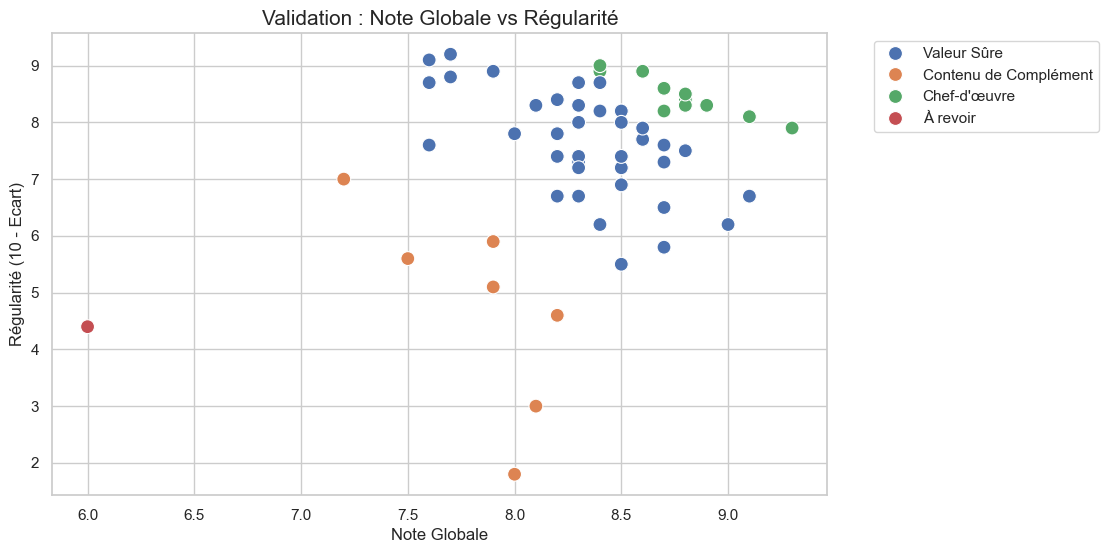

<Figure size 800x500 with 0 Axes>

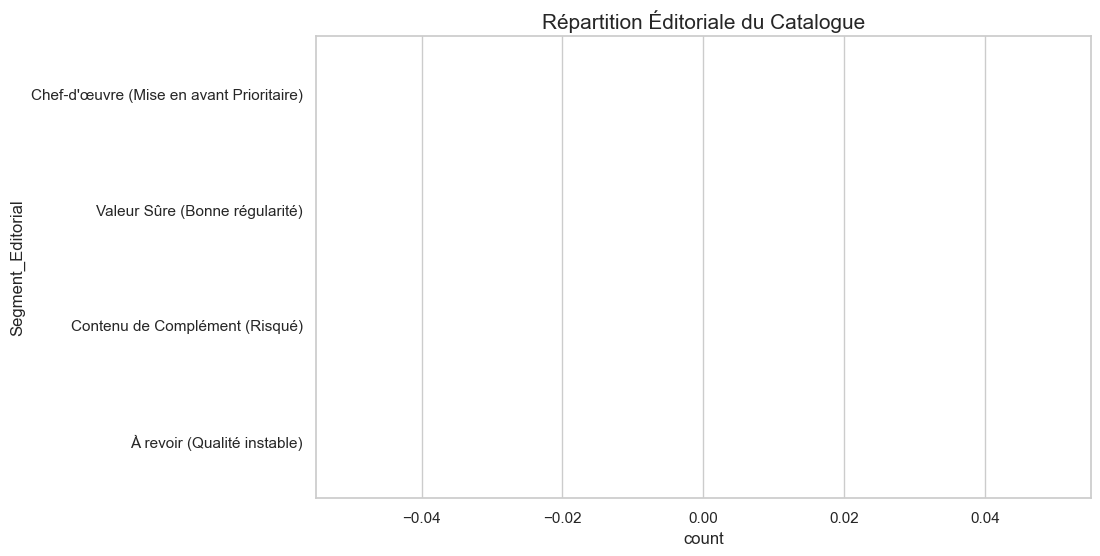

['Valeur Sûre' 'Contenu de Complément' "Chef-d'œuvre" 'À revoir']


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#style visuel
sns.set_theme(style="whitegrid")

#Note Globale vs Régularité
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Note_Globale', y='Regularite', hue='Segment_Editorial', s=100)

plt.title('Validation : Note Globale vs Régularité', fontsize=15)
plt.xlabel('Note Globale', fontsize=12)
plt.ylabel('Régularité (10 - Ecart)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#sauvegarde
plt.savefig('scatter_validation.png', bbox_inches='tight')
plt.show()

# Distribution des Segments
# 
plt.figure(figsize=(8, 5))
ordre = ["Chef-d'œuvre (Mise en avant Prioritaire)", "Valeur Sûre (Bonne régularité)", 
         "Contenu de Complément (Risqué)", "À revoir (Qualité instable)"]

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Segment_Editorial', hue='Segment_Editorial', order=ordre, palette='viridis', legend=False)
plt.title('Répartition Éditoriale du Catalogue', fontsize=15)
plt.show()

print(df['Segment_Editorial'].unique())

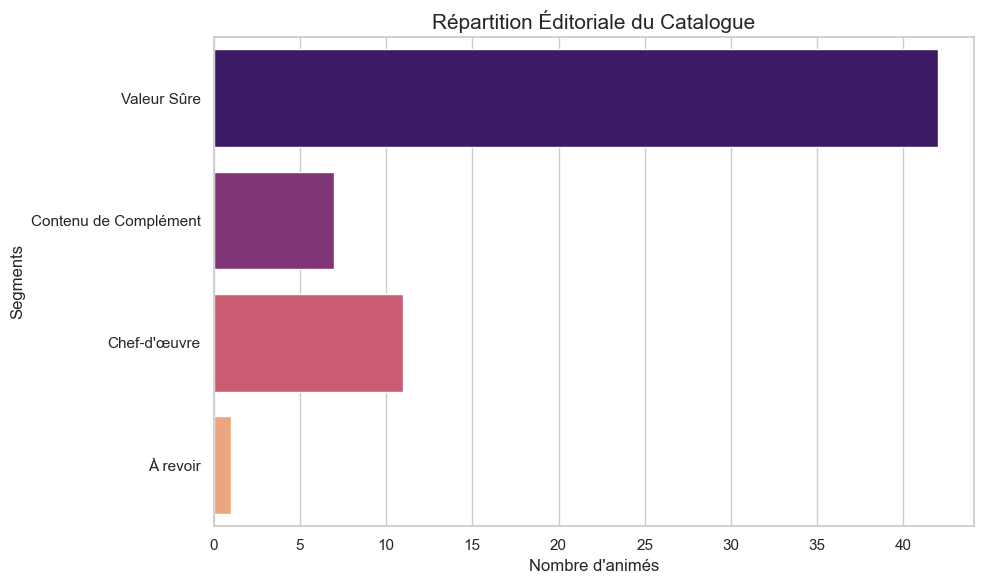

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# On utilise directement 'y' et on laisse Seaborn compter
sns.countplot(data=df, y='Segment_Editorial', hue='Segment_Editorial', palette='magma', legend=False)

plt.title('Répartition Éditoriale du Catalogue', fontsize=15)
plt.xlabel('Nombre d\'animés')
plt.ylabel('Segments')
plt.tight_layout()
plt.show()

# 🏁 Conclusion Générale : Stratégie Éditoriale Pilotée par la Data

### 1. Synthèse de la Problématique métier 
L'objectif de ce projet était de répondre au défi majeur des plateformes de streaming : identifier les animés à "forte valeur éditoriale" de manière proactive. 
Habituellement, les données d'engagement utilisateur mettent des mois à être significatives, ce qui freine la réactivité des curateurs.

### 2. Méthodologie et Innovation : Le Score Éditorial 
Pour pallier ce manque de données immédiates, j'ai développé un **Score Qualité** robuste basé sur deux piliers :
* **La Note Globale (70%)** : Reflet de la qualité perçue par l'audience générale.
* **La Régularité (30%)** : Calculée à partir de l'écart entre le meilleur et le pire épisode ($10 - \text{Ecart}$). Cette variable permet de pénaliser les œuvres trop inégales qui pourraient nuire à l'expérience utilisateur.

### 3. Résultats et Impacts sur le Catalogue 
Grâce à cette approche, nous avons pu transformer des données brutes en segments actionnables:
* **Identification des Chefs-d'œuvre** : Des titres comme *Frieren*, *Steins;Gate* ou *Monster* se distinguent avec des scores supérieurs à 8.7, les plaçant en priorité absolue pour la mise en avant[cite: 112].
* **Optimisation du Catalogue** : La segmentation permet de distinguer clairement les "Valeurs Sûres" des contenus nécessitant une réévaluation ("À revoir").

### 4. Perspectives et Prochaines Étapes 
L'outil est désormais prêt à être utilisé par les curateurs pour automatiser la sélection éditoriale. À l'avenir, ce modèle pourrait être enrichi par :
1.  L'intégration de la réputation des studios de production.
2.  L'analyse de sentiment sur les commentaires récents des utilisateurs.
3.  La prise en compte de la saisonnalité et des tendances de recherche.

**En conclusion, ce projet démontre qu'une approche basée sur la donnée permet de transformer une intuition éditoriale en une décision stratégique mesurable et sécurisée.**

In [15]:
df.to_csv('animes_nettoye.csv', index=False)